In [3]:
!pip install -U spacy
!python -m spacy download en_core_web_md

2023-10-26 03:08:06.872911: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 03:08:06.872980: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 03:08:06.873015: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 03:08:06.884422: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 03:08:08.192415: W tensorflow/compiler/

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import seaborn as sns
import spacy
import re
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as P
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
tqdm.pandas()

import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences, to_categorical

In [2]:
import jrdpackage as jrd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59947 entries, 0 to 59946
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    59947 non-null  object
 1   label   59947 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 936.8+ KB


<Axes: xlabel='label', ylabel='count'>

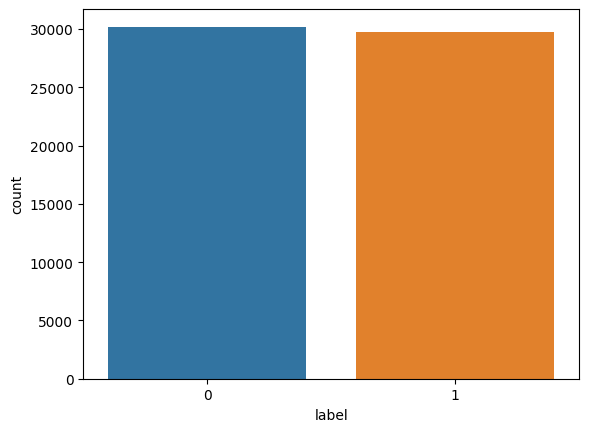

In [12]:
names=['text', 'label']
df = pd.read_csv('drive/MyDrive/train_dataset_reviews.csv', names=names)
df.sample(5)
df.info()
df.groupby('text').nunique()
sns.countplot(x='label',data=df)

In [13]:
data=df[['text','label']]
re_letters=re.compile(r"[^a-zA-Z\s']")

jrd.clean_data(data, re_letters)
data.sample(5)

,text,label
46379,t just dont,0
22695,defently great game big blast play friends pla...,1
11293,personally love game stumbled game gamersdisse...,1
41160,early access review,0
20457,handy little game want release inner beast wit...,1


In [30]:
nlp = spacy.load('en_core_web_md',disable=['ner', 'parser'])
nlp.add_pipe('sentencizer')
nlp.Defaults.stop_words.add("game")
nlp.Defaults.stop_words.add("play")
nlp.Defaults.stop_words.add("t")

data['text']=data['text'].apply(jrd.remove_stopwords)
data.sample(5)

data['text']=data['text'].progress_apply(jrd.lemmatize)
data.sample(5)

100%|██████████| 59947/59947 [05:52<00:00, 170.07it/s]


,text,label
59091,perfect mix tower defense action lot fun point...,0
45449,old great work window machine barely run run c...,0
19855,develop solely thomas happ right man story art...,1
8263,awesome graphic story fighting strategy,1
32744,great long period time recently screw update u...,0


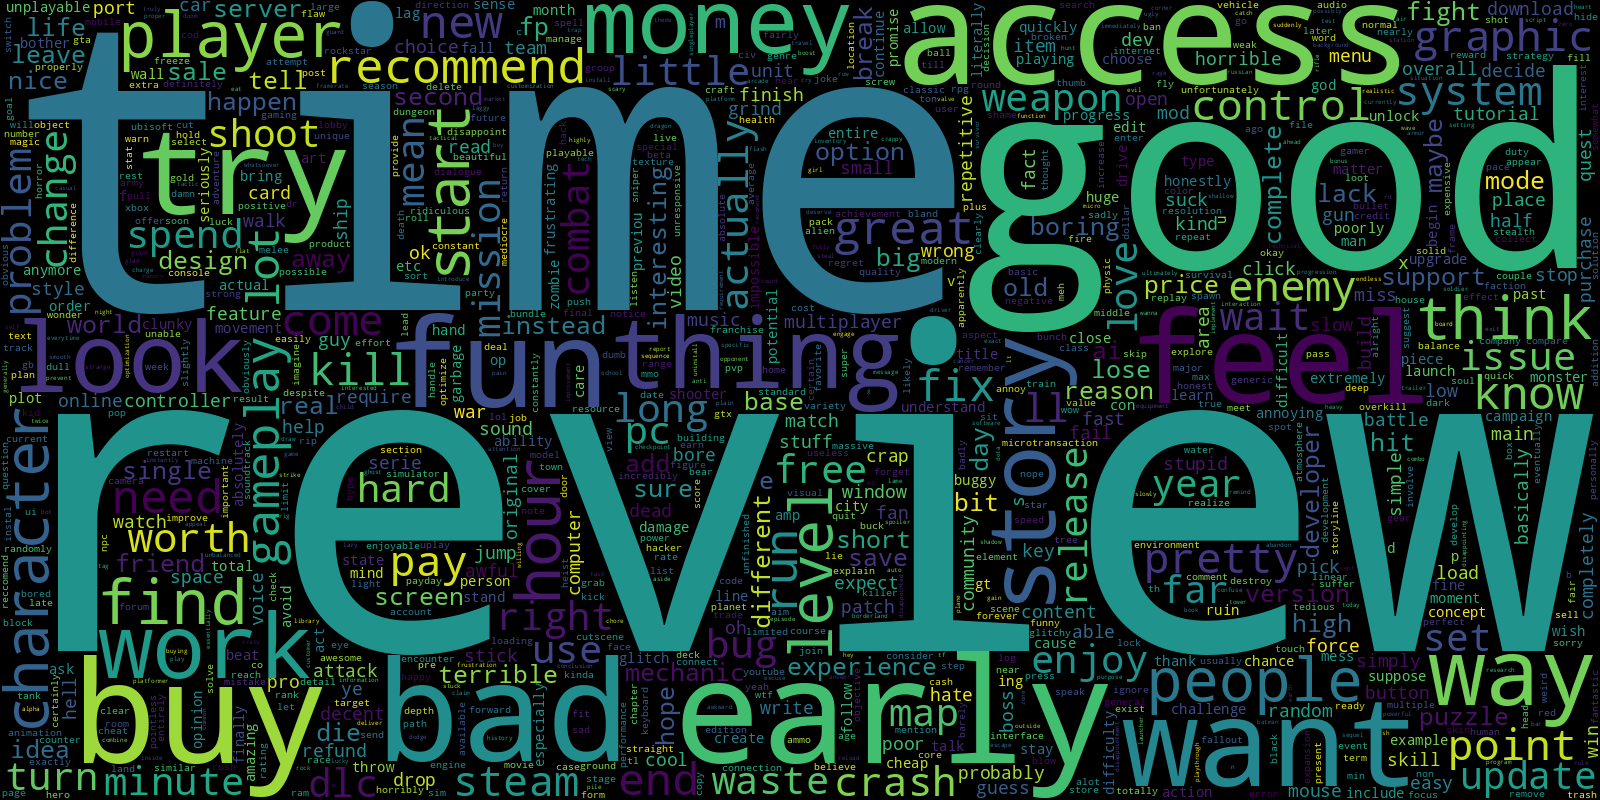

In [32]:
jrd.build_wordcloud(data, 0, 1000, 1600, 800)

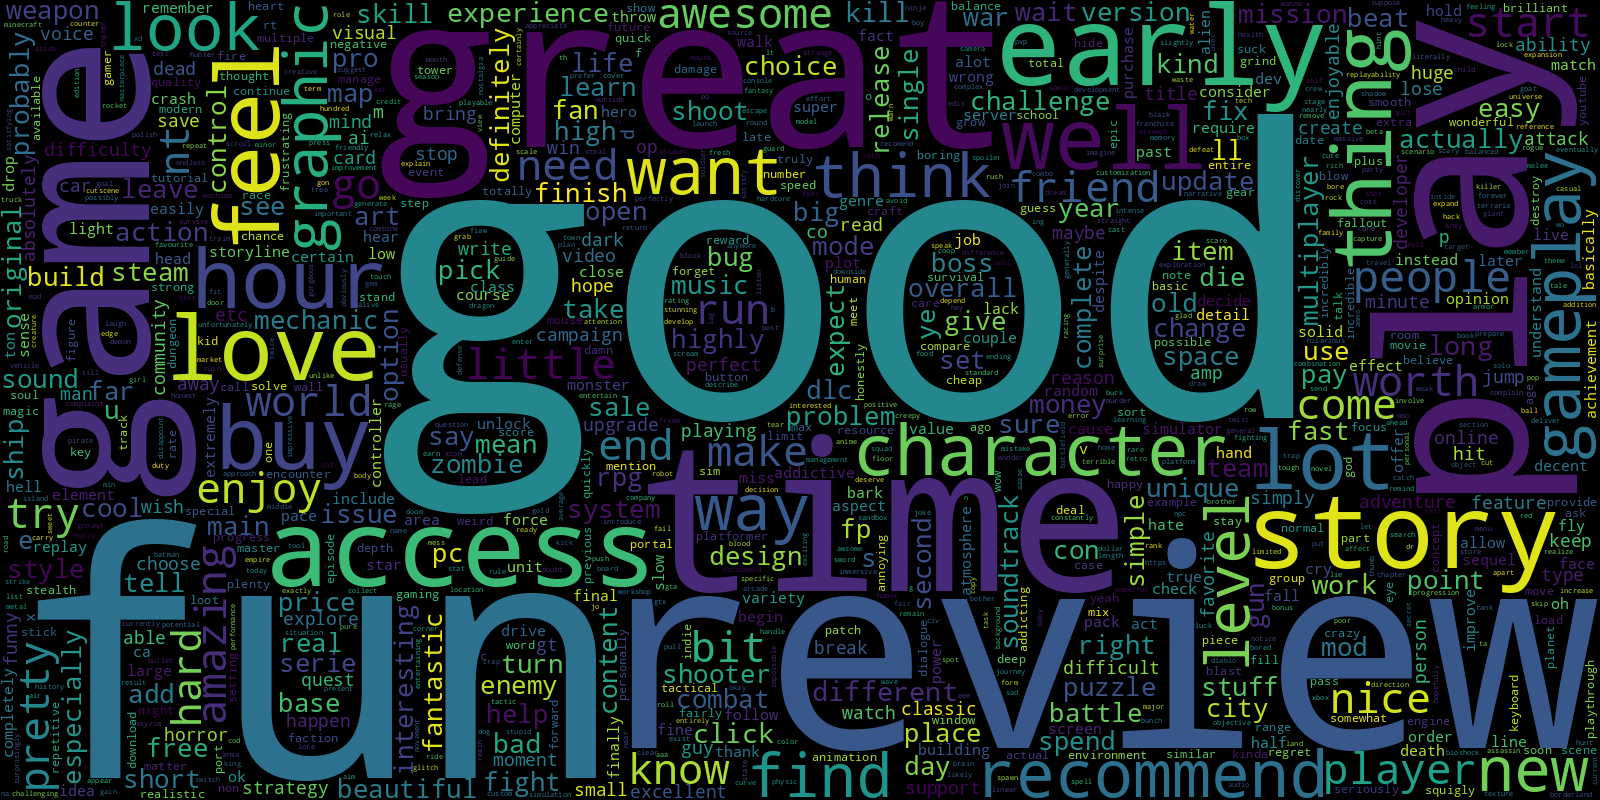

In [18]:
jrd.build_wordcloud(data, 1, 1000, 1600, 800)

In [19]:
max_words = 5000
max_len = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.text)
sequences = tokenizer.texts_to_sequences(data.text)
reviews = pad_sequences(sequences, maxlen=max_len)
print(reviews)

[[   0    0    0 ...    0   69   69]
 [   0    0    0 ...    0  693  175]
 [   0    0    0 ...    0    0   92]
 ...
 [   0    0    0 ...  468 4441 3908]
 [   0    0    0 ...  574    1  317]
 [   0    0    0 ...  211  378  434]]


In [20]:
labels=to_categorical(data.label,num_classes=2)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.1, stratify=labels)

In [22]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40, input_length=max_len))
model3.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model3.add(layers.Dense(2,activation='softmax'))

model3.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_test, y_test))

Epoch 1/10
1686/1686 [==============================] - 541s 319ms/step - loss: 0.5195 - accuracy: 0.7264 - val_loss: 0.4548 - val_accuracy: 0.7703
Epoch 2/10
1686/1686 [==============================] - 543s 322ms/step - loss: 0.4539 - accuracy: 0.7690 - val_loss: 0.4471 - val_accuracy: 0.7711
Epoch 3/10
1686/1686 [==============================] - 544s 323ms/step - loss: 0.4426 - accuracy: 0.7756 - val_loss: 0.4428 - val_accuracy: 0.7746
Epoch 4/10
1686/1686 [==============================] - 549s 325ms/step - loss: 0.4338 - accuracy: 0.7823 - val_loss: 0.4423 - val_accuracy: 0.7808
Epoch 5/10
1686/1686 [==============================] - 544s 322ms/step - loss: 0.4289 - accuracy: 0.7853 - val_loss: 0.4381 - val_accuracy: 0.7780
Epoch 6/10
1686/1686 [==============================] - 562s 333ms/step - loss: 0.4248 - accuracy: 0.7858 - val_loss: 0.4389 - val_accuracy: 0.7810
Epoch 7/10
1686/1686 [==============================] - 579s 344ms/step - loss: 0.4200 - accuracy: 0.7888 - val_

100%|██████████| 17485/17485 [03:00<00:00, 96.72it/s]


<Axes: xlabel='label', ylabel='count'>

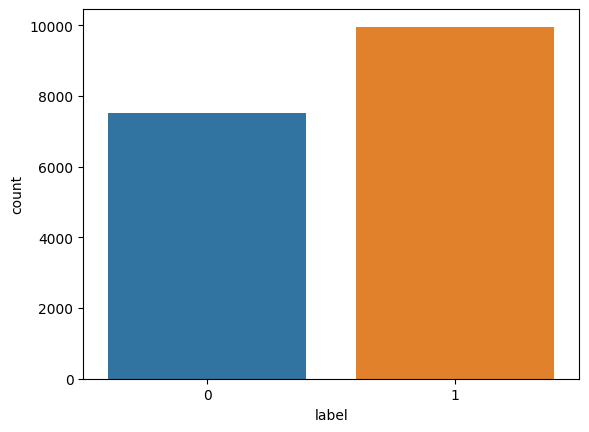

In [25]:
names=['text', 'label']
df_test = pd.read_csv('drive/MyDrive/train_data_reviews.csv', names=names)
data_test=df_test[['text','label']]
clean_data(data_test, re_letters)
data_test['text']=data_test['text'].apply(remove_stopwords)
data_test['text']=data_test['text'].progress_apply(lemmatize)
data_test.sample(5)
sns.countplot(x='label',data=data_test)

In [28]:
# Make predictions on new text data using the pre-trained model
new_sequences = tokenizer.texts_to_sequences(data_test.text)
new_data = pad_sequences(new_sequences, maxlen=max_len)
new_predictions = model3.predict(new_data)

score = 0
print(len(data_test))

# Print the predicted labels for new text data
for i, prediction in enumerate(new_predictions):
    if prediction[1] > prediction[0]:
      label = 1
    else:
      label = 0

    if (data_test.label[i] == label):
      score = score + 1

print(score)
print(score / len(data_test))

547/547 [==============================] - 48s 86ms/step
17485
13430
0.7680869316557049
